### Task 4
【模型评估（2天）】
- 记录5个模型（逻辑回归、SVM、决策树、随机森林、XGBoost）
- 关于accuracy、precision，recall和F1-score、auc值的评分表格，
- 并画出ROC曲线。时间：2天

In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import*
from sklearn.linear_model import LogisticRegression
from  sklearn import svm
from  sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## 数据载入
data = pd.read_csv('data.csv',encoding='gbk')
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Columns: 91 entries, Unnamed: 0 to student_feat_na
dtypes: float64(71), int64(18), object(2)
memory usage: 3.3+ MB


In [3]:
## 处理两个是object的数据，转化为日期数据
object_list = data.describe(include='O').columns.tolist()
for col in object_list:
    data[col] = data[col].astype('datetime64[ns]')
    data['%s_year'%col] = data[col].dt.year.astype('int32')
    data['%s_month'%col] = data[col].dt.month.astype('int32')
    data['%s_day'%col] = data[col].dt.day.astype('int32')
data = data.drop(object_list, axis=1, inplace=False)

In [4]:
## 再次检测数据缺失情况
data.columns[data.isnull().sum()>0]

Index([], dtype='object')

In [5]:
## 划分数据集
X = data.drop(['status'], axis=1)
Y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=666)

In [6]:
## 数据归一化
from sklearn.preprocessing import minmax_scale
X_train = minmax_scale(X_train)
X_test =  minmax_scale(X_test)

SVM
- 线性核函数 svm_linear 
- 多元线性核函数 svm_poly
- 径向基函数 svm_rbf 
- 非线性sigmoid核函数 svm_sigmoid

In [13]:
## 模型整合及预测
# log_reg
log_reg = LogisticRegression(C = 0.1, penalty = 'l1')
log_reg.fit(X_train, y_train)

# SVM_linear
svm_linear = svm.SVC(C = 0.01, kernel = 'linear', probability=True).fit(X_train, y_train)

# SVM_poly
svm_poly =  svm.SVC(C = 0.01, kernel = 'poly', probability=True).fit(X_train, y_train)

# SVM_rvf
svm_rbf =  svm.SVC(gamma = 0.01, C =0.01 , probability=True).fit(X_train, y_train)

# SVM_sigmoid
svm_sigmoid =  svm.SVC(C = 0.01, kernel = 'sigmoid',probability=True).fit(X_train, y_train)

# decision tree
dtree = DecisionTreeClassifier(max_depth=5,min_samples_split=50,min_samples_leaf=60, max_features=9, random_state =2018)
dtree.fit(X_train, y_train)

# xgboost
xgbClassifier = XGBClassifier(learning_rate =0.1, n_estimators=80, max_depth=3, min_child_weight=5,\
                    gamma=0.2, subsample=0.8, colsample_bytree=0.8, reg_alpha=1e-5,\
                    objective= 'binary:logistic', nthread=4,scale_pos_weight=1, seed=27)
xgbClassifier.fit(X_train, y_train)

# RandomForest
rfcClassifier = RandomForestClassifier(oob_score=True, random_state=2018)
rfcClassifier.fit(X_train, y_train)

model_dict = {
    'Logistic' : log_reg,
    'SVM_linear' : svm_linear,
    'SVM_poly' : svm_poly,
    'SVM_rvf' : svm_rbf,
    'SVM_sigmoid' : svm_sigmoid,
    'DecisionTree' : dtree,
    'XGBoost' : xgbClassifier,
    'RandomForest':rfcClassifier,
}

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=60,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=2018, splitter='best')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.2, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_estimators=80, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=2018, verbose=0, warm_start=False)

In [11]:
## 图形参数计算和展示
def get_scores(y, y_pred):
    return [
        accuracy_score(y, y_pred),
        precision_score(y, y_pred),
        recall_score(y, y_pred),
        f1_score(y, y_pred),
        roc_auc_score(y, y_pred),
    ]

def model_metrics(clf, X_train, X_test, y_train, y_test, name):
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    y_train_proba = clf.predict_proba(X_train)[:, 1]
    y_test_proba = clf.predict_proba(X_test)[:, 1]
    df = pd.DataFrame(np.array([get_scores(y_train, y_train_pred),get_scores(y_test, y_test_pred)]),
                      index=[['train','test']], 
                      columns=['Accuracy','Precision','Recall','F1-Score','AUC-Score'])
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label=1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label=1)
    label = ["Train - AUC: {:.4f}".format(auc(fpr_train, tpr_train)),
             "Test - AUC: {:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train, tpr_train)
    plt.plot(fpr_test, tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc=4)
    plt.title("%s ROC curve"%name)
    plt.show()
    return df

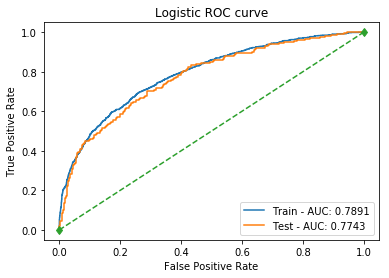

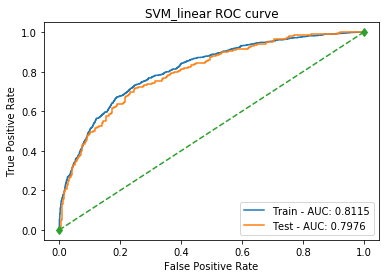

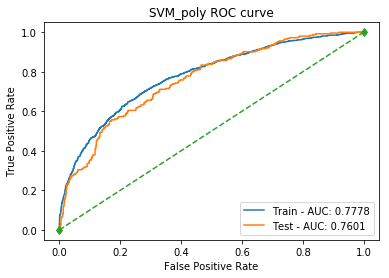

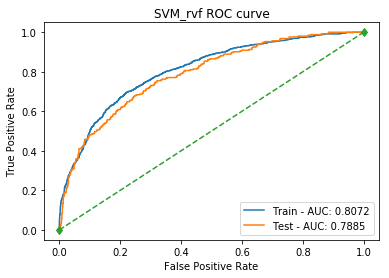

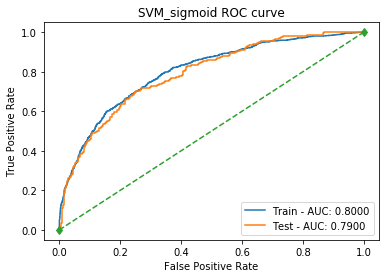

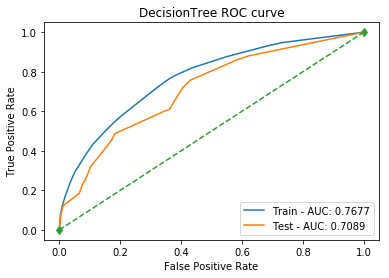

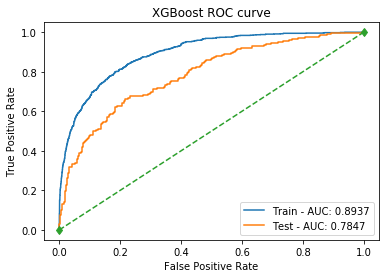

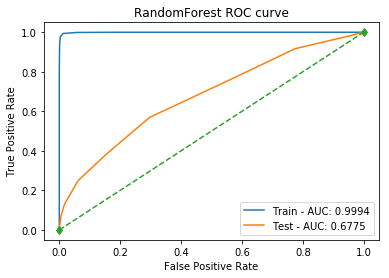

Accuracy  Precision  Recall  F1-Score  AUC-Score
Logistic     train     0.796      0.759   0.255     0.382      0.614
             test      0.763      0.726   0.178     0.286      0.577
SVM_linear   train     0.753      0.000   0.000     0.000      0.500
             test      0.734      0.000   0.000     0.000      0.500
SVM_poly     train     0.753      0.000   0.000     0.000      0.500
             test      0.734      0.000   0.000     0.000      0.500
SVM_rvf      train     0.753      0.000   0.000     0.000      0.500
             test      0.734      0.000   0.000     0.000      0.500
SVM_sigmoid  train     0.753      0.000   0.000     0.000      0.500
             test      0.734      0.000   0.000     0.000      0.500
DecisionTree train     0.787      0.656   0.291     0.404      0.621
             test      0.740      0.526   0.237     0.327      0.580
XGBoost      train     0.845      0.824   0.477     0.604      0.722
             test      0.781      0.785   0.245     0.373      0.610
RandomForest train     0.983      0.997   0.933     0.964      0.966
             test      0.755      0.594   0.249     0.351      0.594

In [14]:
InteractiveShell.ast_node_interactivity = 'all'
df_list = []
for name,model in model_dict.items():
    df_list.append(model_metrics(model, X_train, X_test, y_train, y_test, name))
res = pd.concat(df_list, axis=0, keys=model_dict.keys())
res.round(3)

- 疑问

svm的查准率（精准率）、查全率（召回率）和F1-Score皆为0，原因出在哪里？？